In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [4]:
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [5]:
df1.shape

(1067, 6)

### Exploratory Data Analysis

In [6]:
df1.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [7]:
df1.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [8]:
df1.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


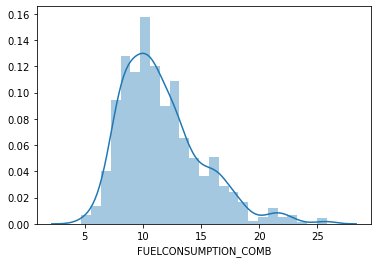

In [9]:
sns.distplot(df1['FUELCONSUMPTION_COMB'])

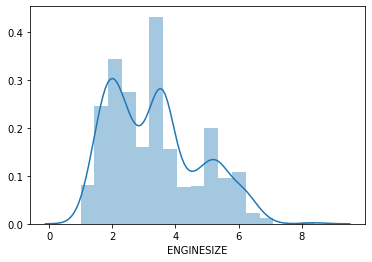

In [10]:
sns.distplot(df1['ENGINESIZE'])

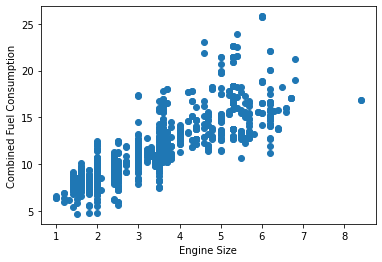

In [11]:
plt.scatter(x=df1['ENGINESIZE'], y=df1['FUELCONSUMPTION_COMB'])
plt.xlabel('Engine Size')
plt.ylabel('Combined Fuel Consumption')
plt.show()

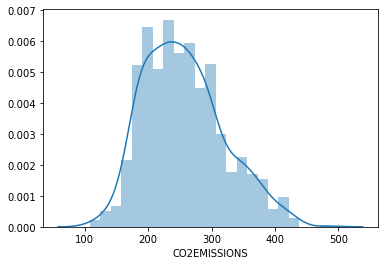

In [12]:
sns.distplot(df1['CO2EMISSIONS'])

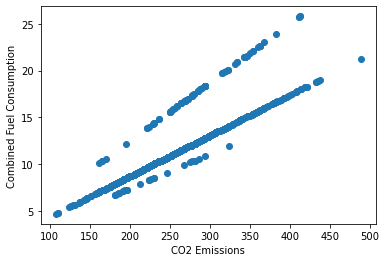

In [13]:
plt.scatter(x=df1['CO2EMISSIONS'], y=df1['FUELCONSUMPTION_COMB'])
plt.xlabel('CO2 Emissions')
plt.ylabel('Combined Fuel Consumption')
plt.show()

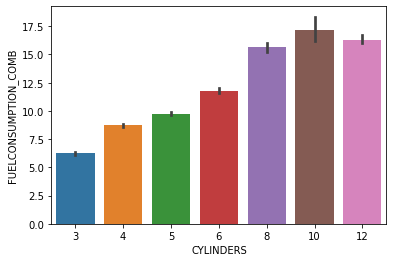

In [14]:
sns.barplot(x=df1['CYLINDERS'], y=df1['FUELCONSUMPTION_COMB'])

### Preprocessing

In [15]:
cylinders = pd.get_dummies(df1['CYLINDERS'], prefix = 'cyl')
cylinders

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,cyl_10,cyl_12
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1062,0,0,0,1,0,0,0
1063,0,0,0,1,0,0,0
1064,0,0,0,1,0,0,0
1065,0,0,0,1,0,0,0


In [16]:
df1 = pd.concat([df1, cylinders], axis = 1)
df1.drop("CYLINDERS", axis = 1, inplace = True)
df1.drop("FUELCONSUMPTION_HWY", axis = 1, inplace = True)
df1.drop("FUELCONSUMPTION_CITY", axis = 1, inplace = True)
df1.head()

,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,cyl_10,cyl_12
0,2.0,8.5,196,0,1,0,0,0,0,0
1,2.4,9.6,221,0,1,0,0,0,0,0
2,1.5,5.9,136,0,1,0,0,0,0,0
3,3.5,11.1,255,0,0,0,1,0,0,0
4,3.5,10.6,244,0,0,0,1,0,0,0


##### Normalization

In [17]:
df1['ENGINESIZE'] = df1['ENGINESIZE'] / df1['ENGINESIZE'].max()
df1['CO2EMISSIONS'] = df1['CO2EMISSIONS'] / df1['CO2EMISSIONS'].max()

### Multiple Linear Regression Model

In [18]:
x = df1.copy()
x.drop('FUELCONSUMPTION_COMB', axis = 1, inplace = True)
y = df1['FUELCONSUMPTION_COMB']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
reg = LinearRegression()

In [21]:
reg.fit(x_train,y_train)
y_hat_train = reg.predict(x_train)

In [22]:
score_train = r2_score(y_train, y_hat_train)
score_train

0.7998031250619131

In [23]:
MSE_train = mean_squared_error(y_train, y_hat_train)
MSE_train

2.4539606244751564

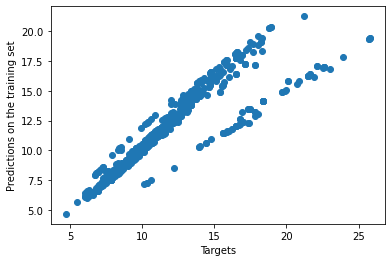

In [24]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('Targets')
plt.ylabel('Predictions on the training set')
plt.show()

Text(0.5, 1.0, 'Training Set Residuals PDF')

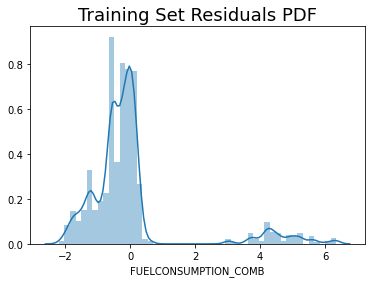

In [25]:
sns.distplot(y_train - y_hat_train)
plt.title("Training Set Residuals PDF", size=18)

In [26]:
y_hat_test = reg.predict(x_test)
score_test = r2_score(y_test, y_hat_test)
MSE_test = mean_squared_error(y_test, y_hat_test)
print(score_test)
print(MSE_test)

0.8332874545482694
1.9247335778145152


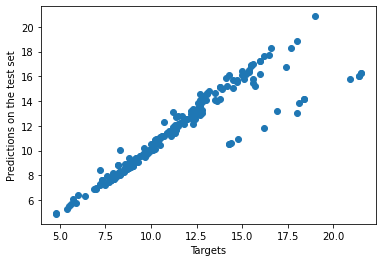

In [27]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets')
plt.ylabel('Predictions on the test set')
plt.show()

Text(0.5, 1.0, 'Test Set Residuals PDF')

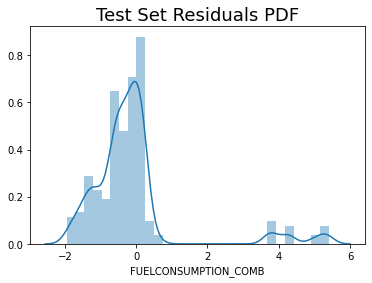

In [28]:
sns.distplot(y_test - y_hat_test)
plt.title("Test Set Residuals PDF", size=18)